In [146]:
import ssl
from tqdm import tqdm
import datetime
import pandas as pd
import os
import math
from tqdm import tqdm

from Download import *
from Scene_split import *
from maintainance import *
from Calculations import *
from Edit_scripts import *

In [42]:
ssl._create_default_https_context = ssl._create_unverified_context

edit_name = "NotLikeUs"

Audiofile = ["https://www.youtube.com/watch?v=T6eK-2OQtew"]

download_main(Audiofile, foldername = "Audiofile", resolution="1080p", audio=True)

In [51]:
Audio_duration = AudioFileClip(f"Audiofile/{os.listdir('Audiofile')[-1]}").duration
Audio_duration

273.48

In [3]:
lyrics = read_lrc_file(f"lrc/{os.listdir('lrc')[-1]}")
lyrics[:5]

[('00:00.05', 'Pss, I see dead people'),
 ('00:05.80', '(Mustard on the beat, ho)'),
 ('00:07.35', 'Ayy, Mustard on the beat, ho'),
 ('00:09.26', 'Deebo, any rap nigga, he a free throw'),
 ('00:11.70', 'Man down, call an amberlamps, tell him: Breathe, bro')]

In [5]:
from functools import partial
lyrics_overlay = partial(create_text_overlay_image, image_width=1920,image_height=1080, font_size=100, font_path="Fonts/CaviarDreams.ttf" )

In [137]:
duration_list = [convert_timestamp_to_seconds(i[0]) for i in lyrics]
duration_list[:10]

[0.05, 5.8, 7.35, 9.26, 11.7, 14.09, 16.18, 18.83, 20.96, 23.61]

In [117]:
# fps = 30

# frame_quantity = []

# for i in range(len(lyrics[:-1])):
#     frame_quantity.append(math.ceil(convert_timestamp_to_seconds(lyrics[i+1][0]) - convert_timestamp_to_seconds(lyrics[i][0])))
# frame_quantity.append(math.ceil(convert_timestamp_to_seconds(lyrics[-1][0]) - Audio_duration))

In [150]:
from moviepy.editor import ImageClip, concatenate_videoclips

def convert_images_to_video(image_folder, time_intervals, output_path="output_video.mp4", fps=30):
    try:
        # Get list of image files sorted by filename
        # image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

        
        image_files = [img for img in os.listdir(image_folder) if img.endswith((".png", ".jpg", ".jpeg"))]
        image_files.sort(key = lambda x: int(os.path.splitext(x)[0]))  # Sort images to ensure correct order

        # Debug: Print the list of image files found
        print("Image files found:", image_files)

        # Ensure the number of images matches the number of time intervals
        if len(image_files) != len(time_intervals) - 1:
            raise ValueError("The number of images must be one less than the number of time intervals")

        # Create a list of image clips
        clips = []
        for i in range(len(image_files)):
            img_path = os.path.join(image_folder, image_files[i])
            start_time = time_intervals[i]
            end_time = time_intervals[i + 1]
            duration = end_time - start_time

            # Debug: Print the image path and duration
            print(f"Processing {img_path} from {start_time} to {end_time} with duration {duration}")

            img_clip = ImageClip(img_path).set_duration(duration).set_start(start_time)
            clips.append(img_clip)

        # Concatenate all clips
        final_clip = concatenate_videoclips(clips, method="compose")

        # Write the final video to a file
        final_clip.write_videofile(output_path, fps=fps)
        print(f"Video successfully created at {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

100%|██████████| 116/116 [00:15<00:00,  7.71it/s]


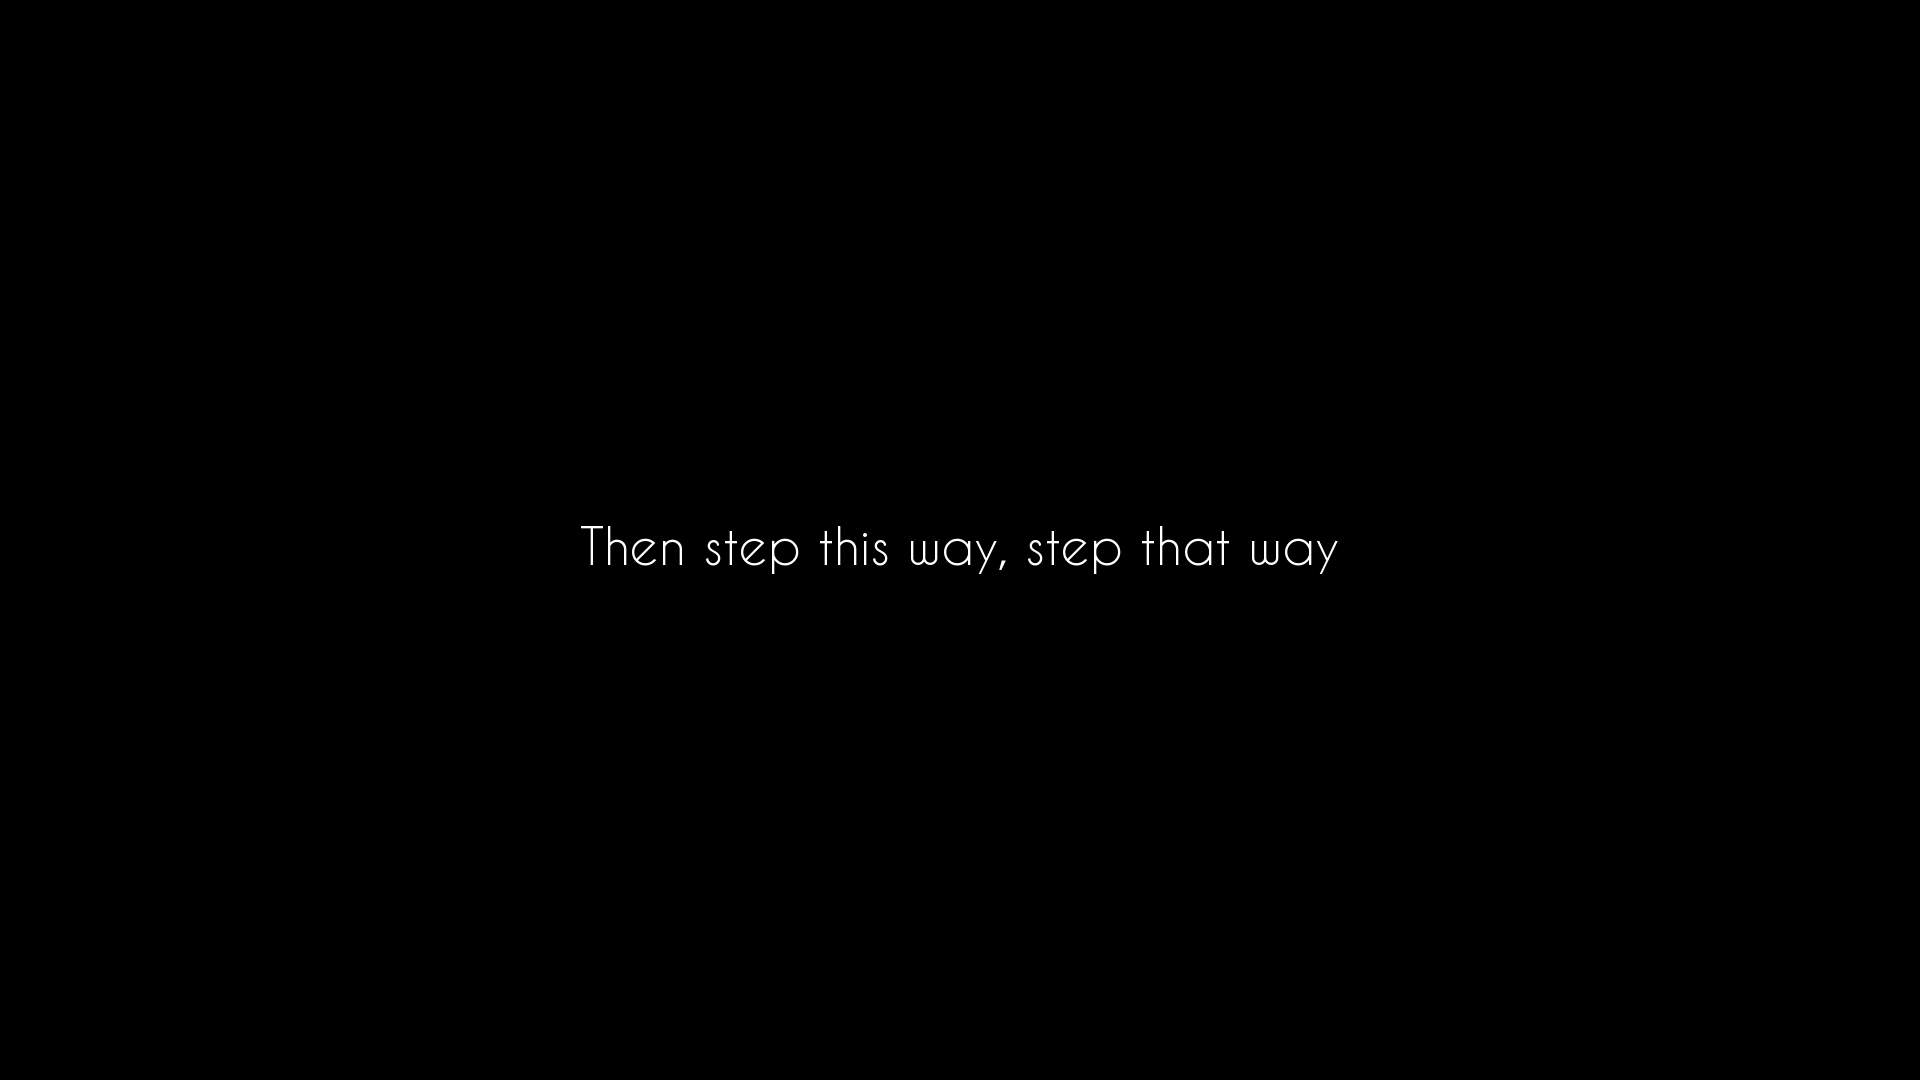

In [147]:
for i in tqdm(range(len(lyrics[:-1]))):
    lyrics_overlay(lyrics[i][1], output_path=f"Overlay_temp/{i}.png", font_size=50)
lyrics_overlay(lyrics[-1][1], output_path=f"Overlay_temp/{i+1}.png", font_size=50)

In [144]:
260.92 / 60

4.348666666666667

In [140]:
fps = 30

In [149]:
convert_images_to_video("Overlay_temp", duration_list, f"Overlays/{edit_name}_Overlay.mp4", fps = fps)

Image files found: ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', 

In [113]:
create_video_from_images("Overlay_temp", f'Overlays/{edit_name}_overlay.mp4', fps = fps, frame_quantity=frame_quantity)

Creating video with FPS: 32
Frame size: 1920x1080
Video saved as Overlays/NotLikeUs_overlay.mp4


In [62]:
temp_del(["Overlay_temp"])

Content of Overlay_temp Deleted
